# **Qiskit Foundations Part I**

# **Installing Qiskit**

In [1]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from qiskit import IBMQ

In [3]:
IBMQ.save_account('dcba64487e24956b59135c56b00a47fd5637bc9019eea775a316d0167a18f9c5c6fbfdac9c9f7bf7b4e9caabf18ffb1730bebd9b28a7c060a353f1495b542761')

configrc.store_credentials:WARNING:2022-10-14 20:25:21,824: Credentials already present. Set overwrite=True to overwrite.


In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# **Hello world!**

In [5]:
from qiskit import *

In [6]:
qreg = QuantumRegister(2)

In [7]:
creg = ClassicalRegister(2)

In [8]:
circuit = QuantumCircuit(qreg,creg)

In [9]:
%matplotlib inline
circuit.draw()

q0_0: 
      
q0_1: 
      
c0_0: 
      
c0_1:

In [10]:
circuit.h(qreg[0])

In [11]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


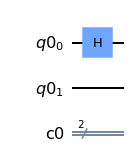

In [12]:
circuit.draw(output='mpl')

In [13]:
circuit.cx(qreg[0], qreg[1])

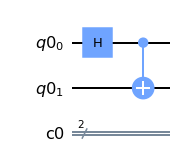

In [14]:
circuit.draw(output='mpl')

# **Measure the quantum bits or qubits**

In [15]:
circuit.measure(qreg, creg)

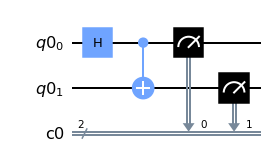

In [16]:
circuit.draw(output='mpl')

# **Running the circuit**

In [17]:
simulator = Aer.get_backend('qasm_simulator')

In [18]:
result = execute(circuit, backend = simulator).result()

In [23]:
from qiskit.visualization import plot_histogram

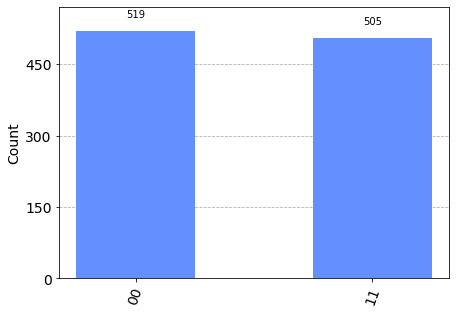

In [24]:
plot_histogram(result.get_counts(circuit))

In [25]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-10-14 20:56:01,245: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [47]:
provider = IBMQ.get_provider('ibm-q')

## **Tip**

To get the list of available backends in service. Let's run the following code:

In [69]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [54]:
from qiskit import IBMQ, Aer
provider = IBMQ.load_account()
available_cloud_backends = provider.backends() 
print('\n Cloud backends:')
for i in available_cloud_backends: print(i)

available_local_backends = Aer.backends() 
print('\n Local backends: ')
for i in available_local_backends: print(i)

ibmqfactory.load_account:WARNING:2022-10-14 21:34:50,990: Credentials are already in use. The existing account in the session will be replaced.



 Cloud backends:
ibmq_qasm_simulator
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila
ibm_nairobi
ibm_oslo

 Local backends: 
aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [63]:
qcomp = provider.get_backend('ibmq_belem')

In [64]:
job = execute(circuit, backend = qcomp)

In [65]:
from qiskit.tools.monitor import job_monitor

In [66]:
job_monitor(job)

Job Status: job has successfully run


In [67]:
result = job.result()

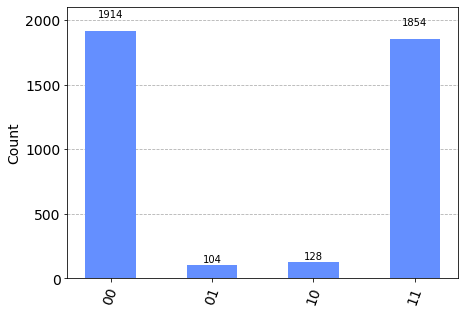

In [68]:
plot_histogram(result.get_counts(circuit))